# Unsupervised preprocessing and visualization

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
# Load dataset
food = pd.read_csv('food.csv')

In [5]:
# Get an overview of the dataset
print("Dataset dimensions: ", food.shape)
print ("\nInfo datatypes:", food.info())
print("\nMissing values per feature:\n", food.isnull().sum())
food.head()

Dataset dimensions:  (25, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  25 non-null     object 
 1   RedMeat     25 non-null     float64
 2   WhiteMeat   25 non-null     float64
 3   Eggs        25 non-null     float64
 4   Milk        25 non-null     float64
 5   Fish        25 non-null     float64
 6   Cereals     25 non-null     float64
 7   Starch      25 non-null     float64
 8   Nuts        25 non-null     float64
 9   Fr.Veg      25 non-null     float64
dtypes: float64(9), object(1)
memory usage: 2.1+ KB

Info datatypes: None

Missing values per feature:
 Unnamed: 0    0
RedMeat       0
WhiteMeat     0
Eggs          0
Milk          0
Fish          0
Cereals       0
Starch        0
Nuts          0
Fr.Veg        0
dtype: int64


,Unnamed: 0,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr.Veg
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


In [ ]:
#Extract countries fpr the plot later on
countries = food.iloc[:, 0] #[Note AI: I got this idea from ChatGPT to extract the country names]
#Get an overview of the subset
countries

0            Albania
1            Austria
2            Belgium
3           Bulgaria
4     Czechoslovakia
5            Denmark
6          E Germany
7            Finland
8             France
9             Greece
10           Hungary
11           Ireland
12             Italy
13       Netherlands
14            Norway
15            Poland
16          Portugal
17           Romania
18             Spain
19            Sweden
20       Switzerland
21                UK
22              USSR
23         W Germany
24        Yugoslavia
Name: Unnamed: 0, dtype: object

In [ ]:
# Handle missing values (optional, depending on dataset)
food = food.dropna()  # Drop rows with missing values (for simplicity)
#Keep only numeric columns (remove non-numeric columns)
food_numeric = food.select_dtypes(include=[np.number])  #[Note AI: ChatGPT helpd to find the function to select numeric columns only]

In [8]:
# Feature scaling (Z-transformation using StandardScaler)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(food_numeric)

In [9]:
# Perform PCA
pca = PCA(n_components=2)  # We'll focus on the first two principal components
pca_result = pca.fit_transform(scaled_data)

In [ ]:
# Create a DataFrame for PCA results
pca_food = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

pca_food['Country'] = countries  # Add countries

In [11]:
# Explained variance ratio to understand how much variance is captured by each principal component
print("\nExplained variance ratio of each principal component: ", pca.explained_variance_ratio_)



Explained variance ratio of each principal component:  [0.44515973 0.18166661]


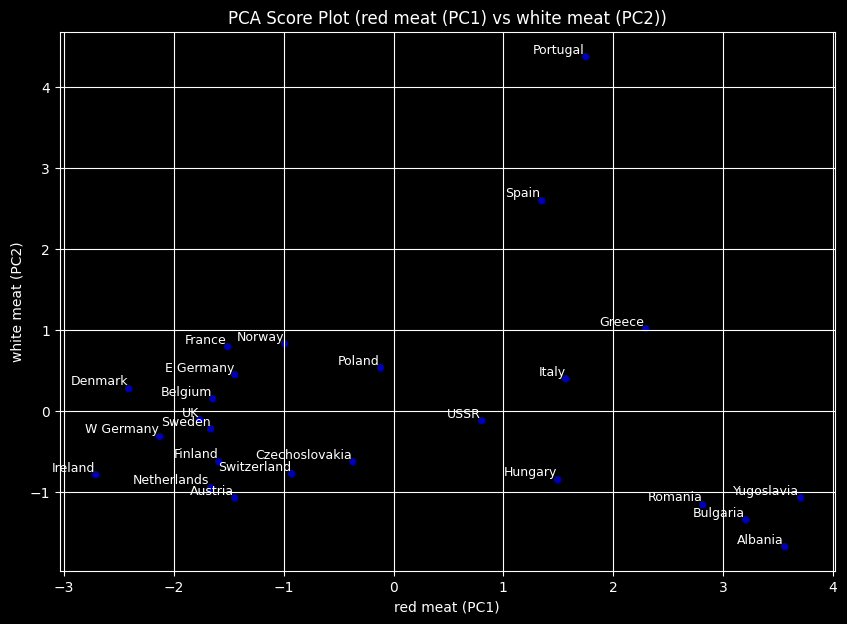

In [ ]:
# Plot the score plot (PC1 vs PC2)
plt.figure(figsize=(10, 7))
plt.scatter(pca_food['PC1'], pca_food['PC2'], color='blue', edgecolor='k', alpha=0.7)

# Write country names in the plot [Note AI: ChatGPT helped me to find a solution to add country names]
for i, country in enumerate(pca_food['Country']):
    plt.text(pca_food['PC1'][i], pca_food['PC2'][i], country, fontsize=9, ha='right', va='bottom')

plt.title('PCA Score Plot (red meat (PC1) vs white meat (PC2))')
plt.xlabel('red meat (PC1)')
plt.ylabel('white meat (PC2)')
plt.grid(True)
plt.show()